# 13. plotly

## 13.1 필요한 라이브러리 로드

In [6]:
#!jupyter labextension install jupyterlab-plotly (jupyter lab 에서 차트 시각화를 위해 extension 설치 필요)

import pandas as pd
import plotly.express as px
import plotly.offline as pyo
pyo.init_notebook_mode() # Set notebook mode to work in offline

<br>

## 13.2 plotly 예제 링크

- [Time Series and Date Axes in Python](https://plotly.com/python/time-series)

<br>

## 13.3 `px` 내장 데이터(`data.stocks`) 불러오기

In [7]:
df = px.data.stocks() # 각각의 종목의 2018-01-01 기준 일별 수익률 (2018 ~ 2019)
df.head()

date      GOOG      AAPL      AMZN        FB      NFLX      MSFT
0  2018-01-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000
1  2018-01-08  1.018172  1.011943  1.061881  0.959968  1.053526  1.015988
2  2018-01-15  1.032008  1.019771  1.053240  0.970243  1.049860  1.020524
3  2018-01-22  1.066783  0.980057  1.140676  1.016858  1.307681  1.066561
4  2018-01-29  1.008773  0.917143  1.163374  1.018357  1.273537  1.040708

In [8]:
df.tail()

date      GOOG      AAPL      AMZN        FB      NFLX      MSFT
100  2019-12-02  1.216280  1.546914  1.425061  1.075997  1.463641  1.720717
101  2019-12-09  1.222821  1.572286  1.432660  1.038855  1.421496  1.752239
102  2019-12-16  1.224418  1.596800  1.453455  1.104094  1.604362  1.784896
103  2019-12-23  1.226504  1.656000  1.521226  1.113728  1.567170  1.802472
104  2019-12-30  1.213014  1.678000  1.503360  1.098475  1.540883  1.788185

In [9]:
df.shape

(105, 7)

<br>

## 13.4 일별 수익률 선 그래프 그리기

- 화면 캡쳐, zoom in, zoom out 등 다양한 interactive 한 action을 할 수 있다.

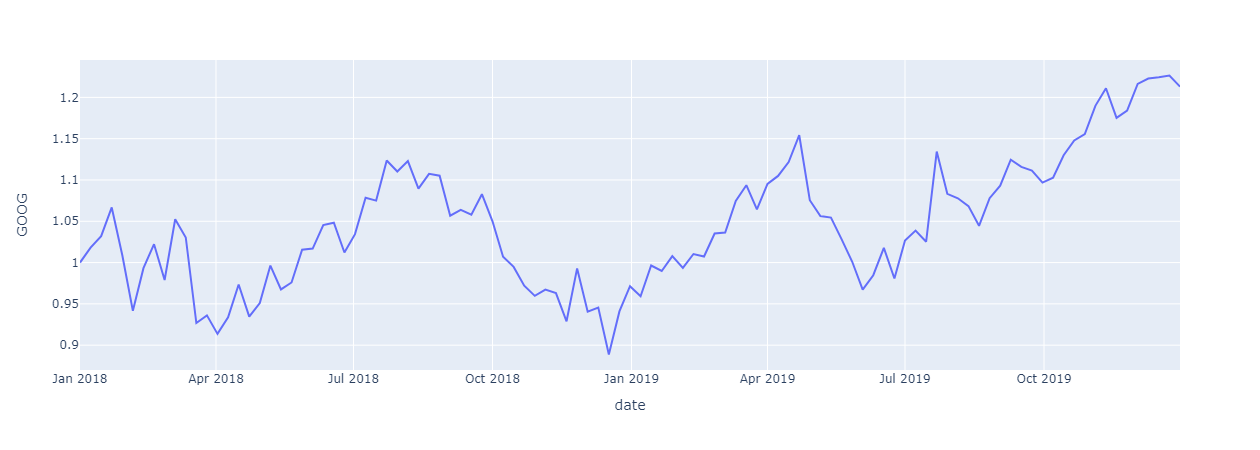

In [11]:
px.line(df, x='date', y='GOOG') # Google

<br>

## 13.5 일별 수익률 막대 그래프 그리기

### 13.5.1 기본 막대 그래프

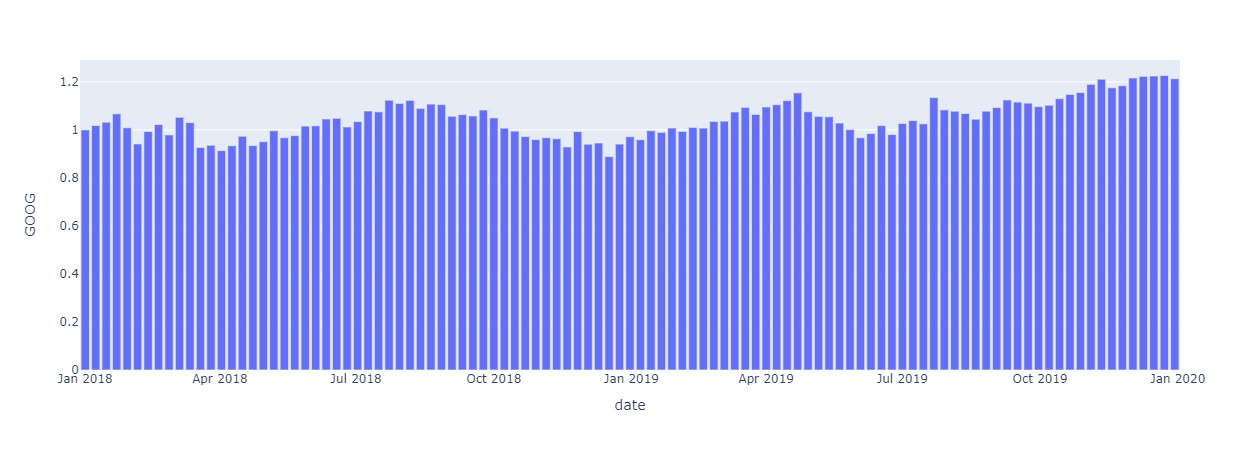

In [12]:
px.bar(df, x='date', y='GOOG')

<br>

### 13.5.2 기준을 0으로 만든 막대 그래프

- 일별 수익률이 2018-01-01 을 1로 하여 기준으로 삼고 있으므로 전체적으로 1을 빼줘서 변동성을 확인

In [16]:
# date 컬럼 인덱스로 지정 후 1 빼주기
df_1 = df.set_index('date') - 1
df_1.head()

GOOG      AAPL      AMZN        FB      NFLX      MSFT
date                                                                  
2018-01-01  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
2018-01-08  0.018172  0.011943  0.061881 -0.040032  0.053526  0.015988
2018-01-15  0.032008  0.019771  0.053240 -0.029757  0.049860  0.020524
2018-01-22  0.066783 -0.019943  0.140676  0.016858  0.307681  0.066561
2018-01-29  0.008773 -0.082857  0.163374  0.018357  0.273537  0.040708

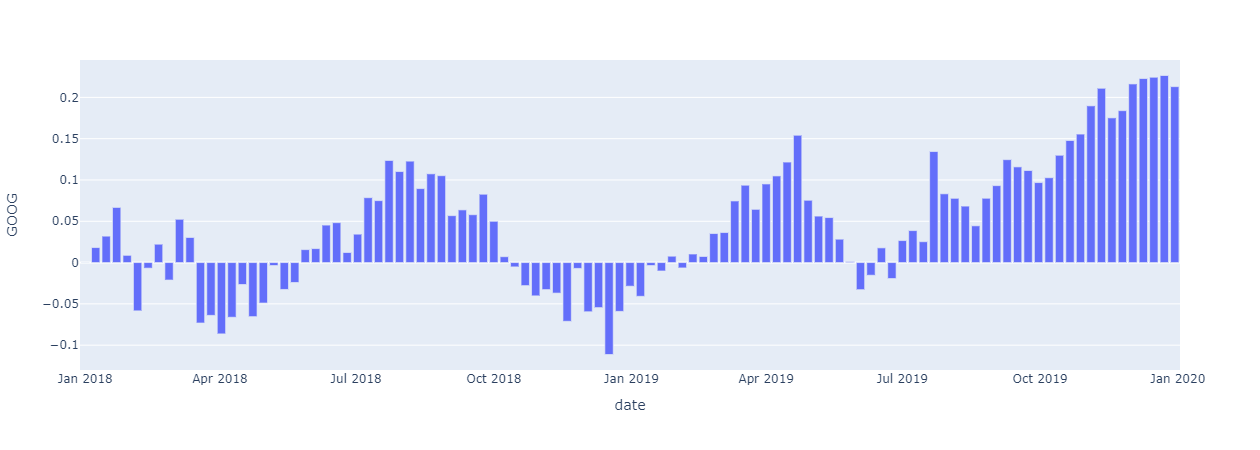

In [18]:
# date 컬럼을 인덱스로 지정했기 때문에 x에 "df_1.index" 지정
px.bar(df_1, x=df_1.index, y='GOOG')

<br>

## 13.6 `facet_col`을 사용한 서브플롯 그리기

### 13.6.1 company 지정

- `df_1.columns`의 `name`을 `company`로 지정

In [22]:
df_1.columns.name = 'company'
df_1.head()

company         GOOG      AAPL      AMZN        FB      NFLX      MSFT
date                                                                  
2018-01-01  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
2018-01-08  0.018172  0.011943  0.061881 -0.040032  0.053526  0.015988
2018-01-15  0.032008  0.019771  0.053240 -0.029757  0.049860  0.020524
2018-01-22  0.066783 -0.019943  0.140676  0.016858  0.307681  0.066561
2018-01-29  0.008773 -0.082857  0.163374  0.018357  0.273537  0.040708

<br>

### 13.6.2 `px.area()` 를 이용하여 그래프 그리기

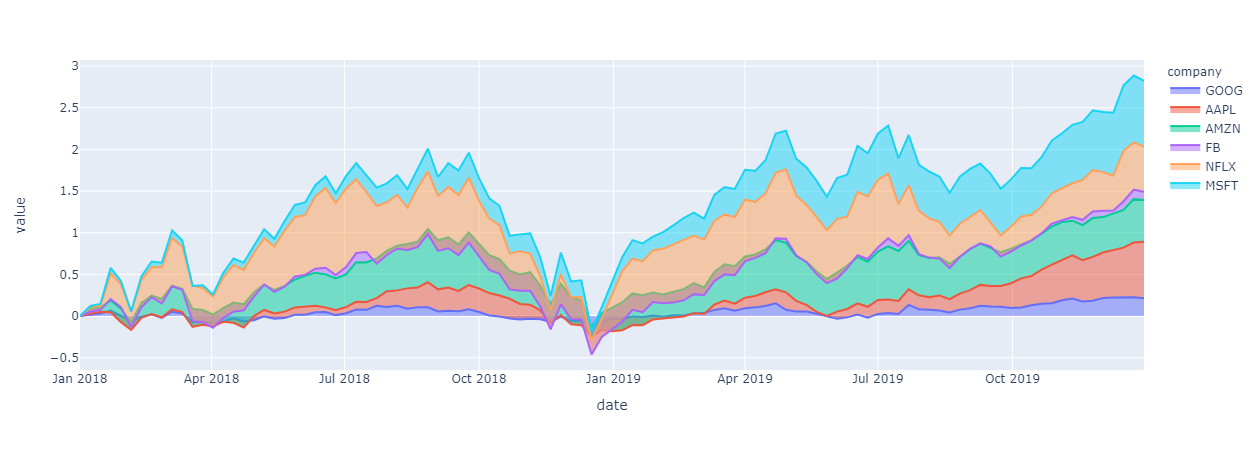

In [24]:
px.area(df_1)

<br>

### 13.6.3 `facet_col`을 사용하여 서브플롯 생성

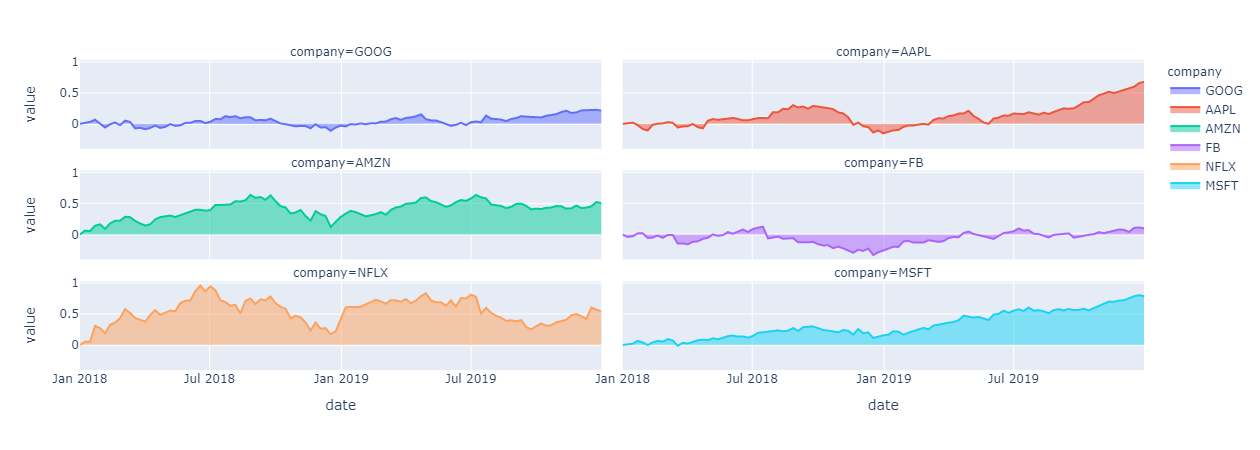

In [26]:
px.area(df_1, facet_col='company', facet_col_wrap=2)

<br>

## 13.7 여러 종목을 하나의 그래프로 표현하기

### 13.7.1 선 그래프 시각화

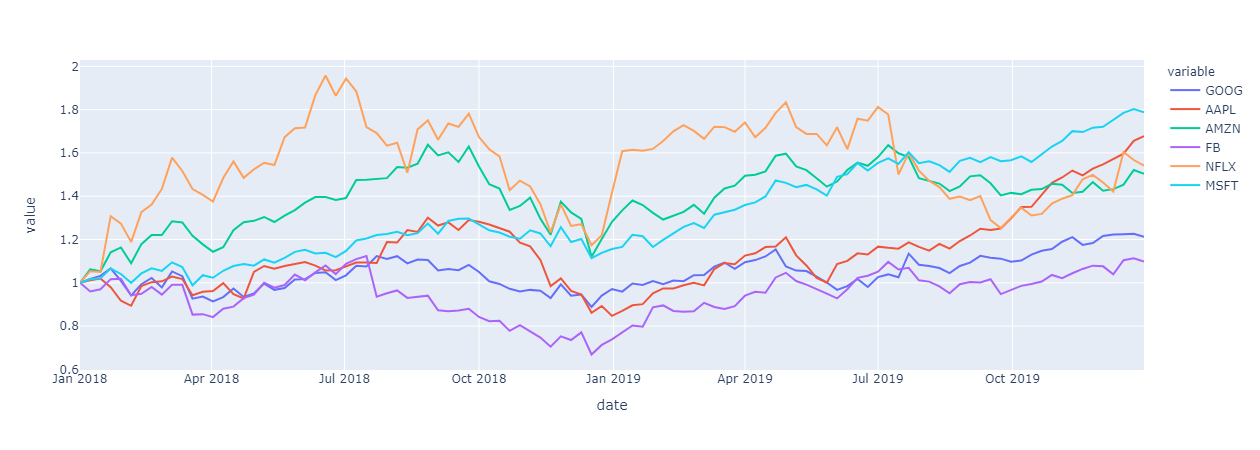

In [27]:
px.line(df, x='date', y=df.columns)

<br>

### 13.7.2 `hover_data` 속성을 활용하여 tick label 데이터 추가

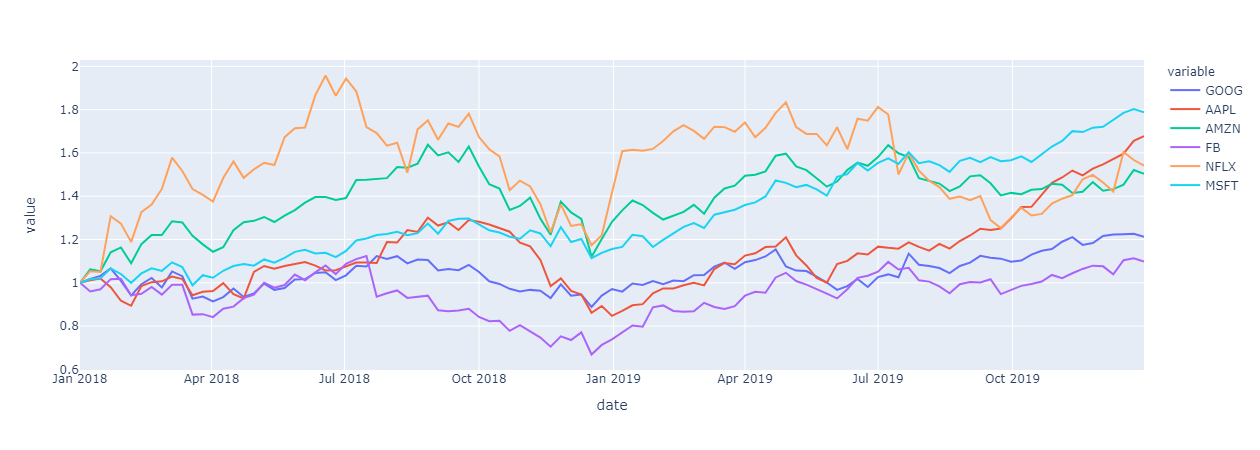

In [35]:
px.line(df, x='date', y=df.columns, hover_data={'date': '|%Y-%m-%d'})

<br>

### 13.7.3 x축 날짜 표출 방법 변경

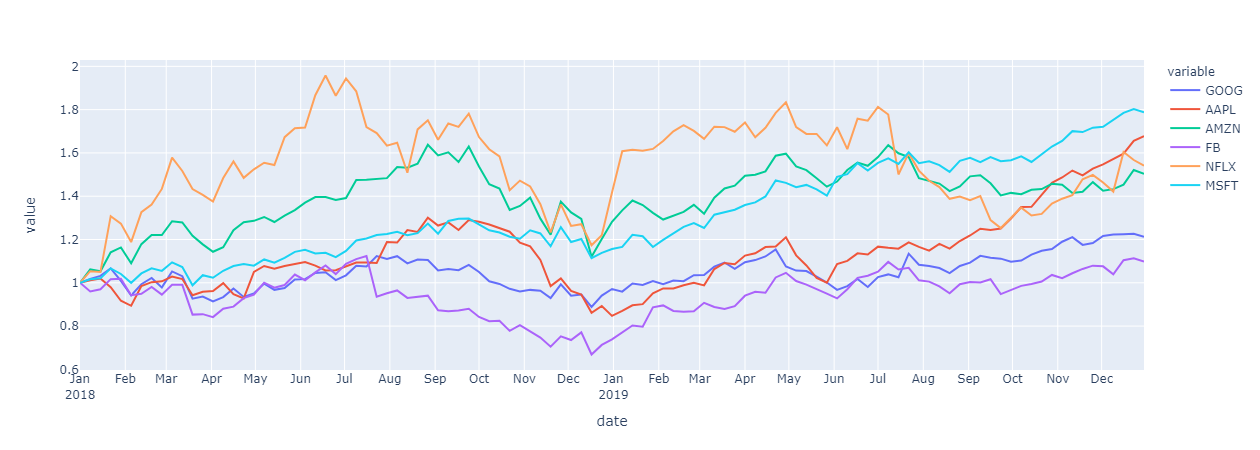

In [36]:
fig = px.line(df, x='date', y=df.columns, hover_data={'date': '|%Y-%m-%d'})
fig.update_xaxes(dtick='M1',
                 tickformat='%b\n%Y')

<br>

## 13.8 Range Slider와 함께 시계열 그래프 그리기

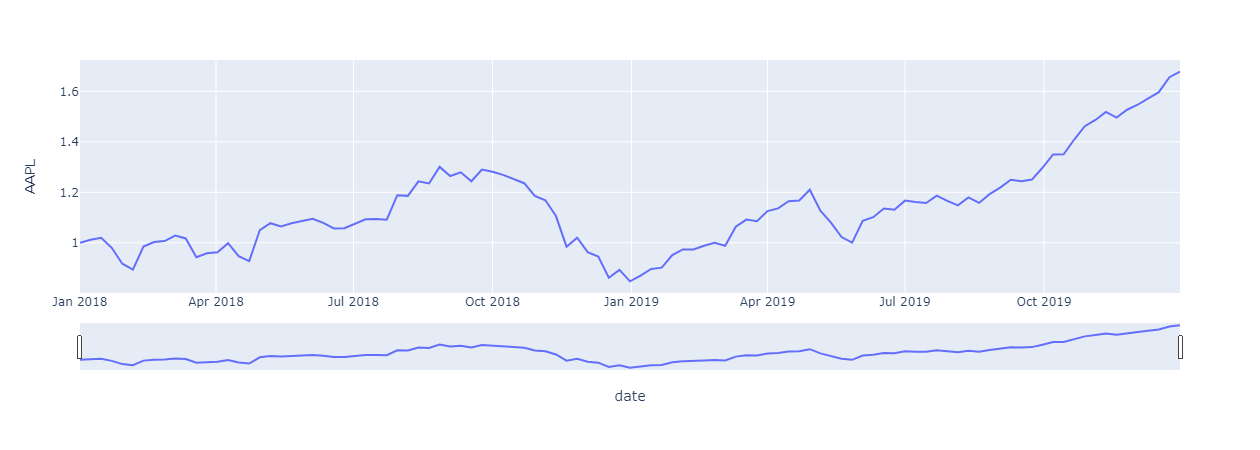

In [39]:
fig = px.line(df, x='date', y='AAPL')
fig.update_xaxes(rangeslider_visible=True)